In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import quandl
from datetime import datetime
import backtrader as bt
import backtrader.feeds as btfeeds
import backtrader.analyzers as btanalyzers
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from graham import *

quandl.ApiConfig.api_key = os.getenv('QUANDL_APY_KEY')

In [9]:
def get_trading_data(ticker, start_date, end_date, source='yahoo'):
    if source == 'yahoo':
        result = pdr.get_data_yahoo(symbols=ticker, start=start_date, end=end_date)
        result = result[['Open', 'High', 'Low', 'Adj Close', 'Volume']][:-1]
        result.columns = ['open', 'high', 'low', 'close', 'volume']
        result.index.names = ['date']
    elif source == 'sharadar':
        columns = ['date', 'open', 'high', 'low', 'close', 'volume']
        result = quandl.get_table('SHARADAR/SEP', ticker=ticker, qopts={"columns":columns}, 
                              date={'gte': start_date, 'lte': end_date})
        result.set_index('date', inplace=True)
        result.sort_index(inplace=True)
    else:
        result = pd.DataFrame()

    df_pe = quandl.get_table('SHARADAR/DAILY', ticker=ticker, qopts={"columns":["date", "pe", 'pb']}, 
                              date={'gte': start_date, 'lte': end_date})
    df_pe.set_index('date', inplace=True)
    df_pe.sort_index(inplace=True)
    df_pe['pexpb'] = df_pe['pe'] * df_pe['pb']

    result = pd.concat([result, df_pe], axis=1)
    return result

In [10]:
start_date = datetime(2008, 12, 31)
end_date = datetime(2019, 1, 1)

df1 = get_trading_data('NKE', start_date, end_date)
df2 = get_trading_data('BAX', start_date, end_date)

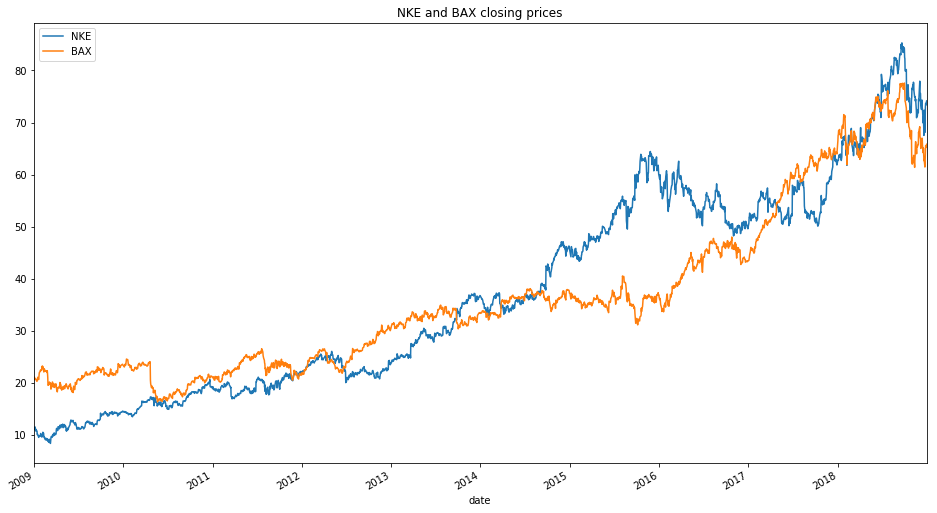

In [11]:
pd.concat([df1[['close']].rename(columns={'close': 'NKE'}), 
           df2[['close']].rename(columns={'close': 'BAX'})], 
          axis=1).plot(title=f"NKE and BAX closing prices", figsize=(16, 9))

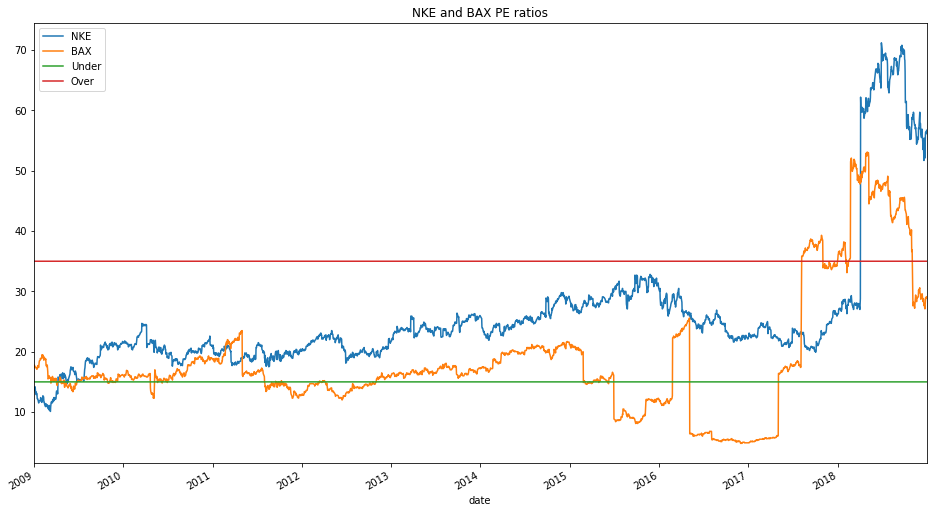

In [12]:
df_temp = pd.concat([df1[['pe']].rename(columns={'pe': 'NKE'}), 
                     df2[['pe']].rename(columns={'pe': 'BAX'})], 
                    axis=1)
df_temp['Under'] = 15
df_temp['Over'] = 35
df_temp.plot(title=f"NKE and BAX PE ratios", figsize=(16, 9))

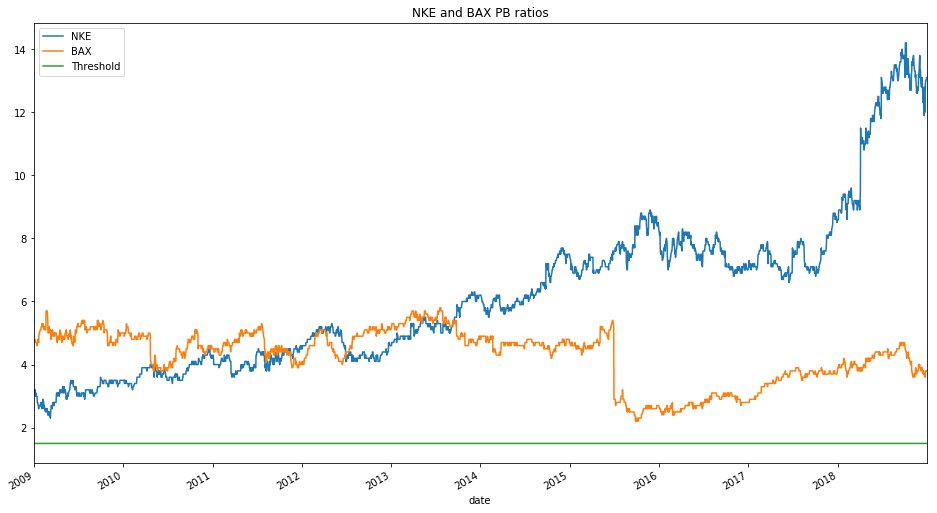

In [13]:
df_temp = pd.concat([df1[['pb']].rename(columns={'pb': 'NKE'}), 
                     df2[['pb']].rename(columns={'pb': 'BAX'})], 
                    axis=1)
df_temp['Threshold'] = 1.5
df_temp.plot(title=f"NKE and BAX PB ratios", figsize=(16, 9))

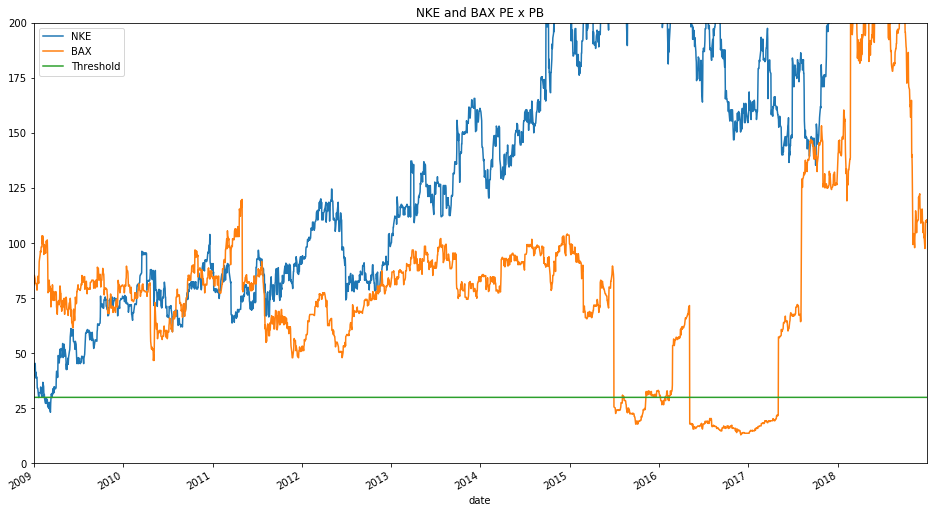

In [18]:
df_temp = pd.concat([df1[['pexpb']].rename(columns={'pexpb': 'NKE'}), 
                     df2[['pexpb']].rename(columns={'pexpb': 'BAX'})], 
                    axis=1)
df_temp['Threshold'] = 30
df_temp.plot(title=f"NKE and BAX PE x PB", figsize=(16, 9), ylim=(0,200))